In [28]:
from statistics import correlation

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

plt.rcParams['font.family'] = 'DejaVu Sans'

# Merging data

In [29]:
csv_files = glob.glob(os.path.join("*.csv"))
emissions = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
emissions

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source,Data estimated,Data estimation method
0,2021-01-01T00:00:00.000000,Denmark,Denmark,DK,124.66,194.25,81.99,69.99,entsoe.eu,False,NaN
1,2021-01-01T01:00:00.000000,Denmark,Denmark,DK,111.30,182.42,83.66,70.19,entsoe.eu,False,NaN
2,2021-01-01T02:00:00.000000,Denmark,Denmark,DK,108.22,179.20,83.96,70.10,entsoe.eu,False,NaN
3,2021-01-01T03:00:00.000000,Denmark,Denmark,DK,111.48,183.04,83.55,69.64,entsoe.eu,False,NaN
4,2021-01-01T04:00:00.000000,Denmark,Denmark,DK,118.55,191.54,82.64,69.15,entsoe.eu,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43819,2025-12-31T19:00:00.000000,Denmark,Denmark,DK,103.88,170.66,85.19,80.95,entsoe.eu,False,NaN
43820,2025-12-31T20:00:00.000000,Denmark,Denmark,DK,106.39,170.86,84.76,80.49,entsoe.eu,False,NaN
43821,2025-12-31T21:00:00.000000,Denmark,Denmark,DK,87.89,140.17,87.42,80.60,entsoe.eu,False,NaN
43822,2025-12-31T22:00:00.000000,Denmark,Denmark,DK,77.02,123.40,88.99,82.10,entsoe.eu,False,NaN


# Data Cleaning

## Estimated values

In [30]:
estimated = emissions[emissions["Data estimated"] == True]
estimated

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source,Data estimated,Data estimation method
9728,2022-02-10T08:00:00.000000,Denmark,Denmark,DK,175.33,241.05,76.14,72.34,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
9729,2022-02-10T09:00:00.000000,Denmark,Denmark,DK,136.80,193.53,80.57,76.28,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
9730,2022-02-10T10:00:00.000000,Denmark,Denmark,DK,134.73,190.94,80.83,75.87,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
9731,2022-02-10T11:00:00.000000,Denmark,Denmark,DK,128.75,183.68,81.76,76.87,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
9732,2022-02-10T12:00:00.000000,Denmark,Denmark,DK,127.22,182.20,82.06,77.01,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
...,...,...,...,...,...,...,...,...,...,...,...
41672,2025-10-03T08:00:00.000000,Denmark,Denmark,DK,65.44,109.18,90.60,90.16,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
41673,2025-10-03T09:00:00.000000,Denmark,Denmark,DK,60.12,100.75,91.53,90.07,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
41674,2025-10-03T10:00:00.000000,Denmark,Denmark,DK,52.02,90.91,92.70,91.19,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY
41675,2025-10-03T11:00:00.000000,Denmark,Denmark,DK,46.86,83.65,93.40,92.21,entsoe.eu,True,ESTIMATED_FORECASTS_HIERARCHY


## Dropping columns

In [31]:
emissions = emissions.drop(columns=["Data estimated", "Country", "Zone name", "Data source", "Data estimation method"])
emissions

,Datetime (UTC),Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%)
0,2021-01-01T00:00:00.000000,DK,124.66,194.25,81.99,69.99
1,2021-01-01T01:00:00.000000,DK,111.30,182.42,83.66,70.19
2,2021-01-01T02:00:00.000000,DK,108.22,179.20,83.96,70.10
3,2021-01-01T03:00:00.000000,DK,111.48,183.04,83.55,69.64
4,2021-01-01T04:00:00.000000,DK,118.55,191.54,82.64,69.15
...,...,...,...,...,...,...
43819,2025-12-31T19:00:00.000000,DK,103.88,170.66,85.19,80.95
43820,2025-12-31T20:00:00.000000,DK,106.39,170.86,84.76,80.49
43821,2025-12-31T21:00:00.000000,DK,87.89,140.17,87.42,80.60
43822,2025-12-31T22:00:00.000000,DK,77.02,123.40,88.99,82.10


# Analysis
## Correlation Matrix

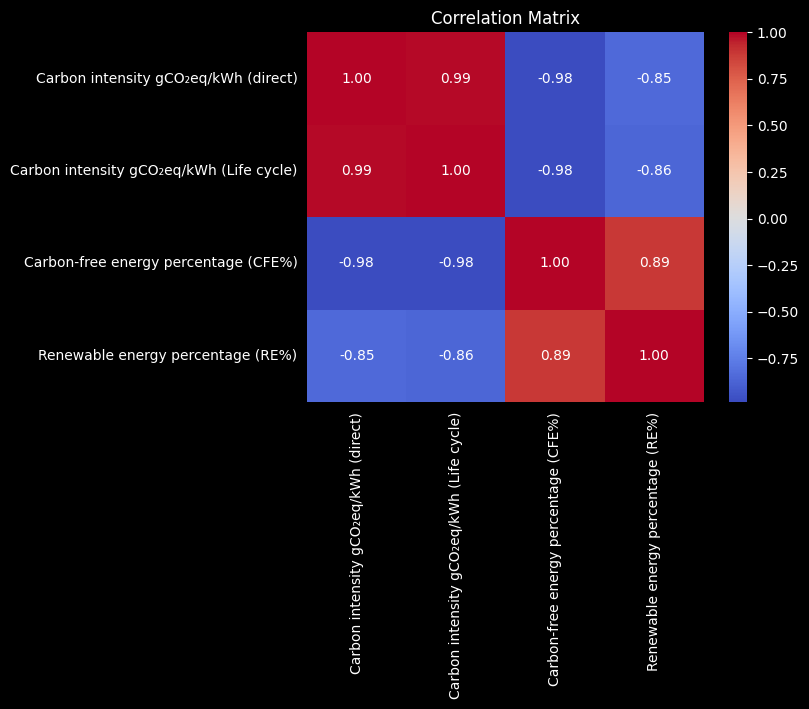

In [32]:
correlation_matrix = emissions[
    ["Carbon intensity gCO₂eq/kWh (direct)",
     "Carbon intensity gCO₂eq/kWh (Life cycle)",
     "Carbon-free energy percentage (CFE%)",
     "Renewable energy percentage (RE%)"]
].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

## Carbon intensity over the years

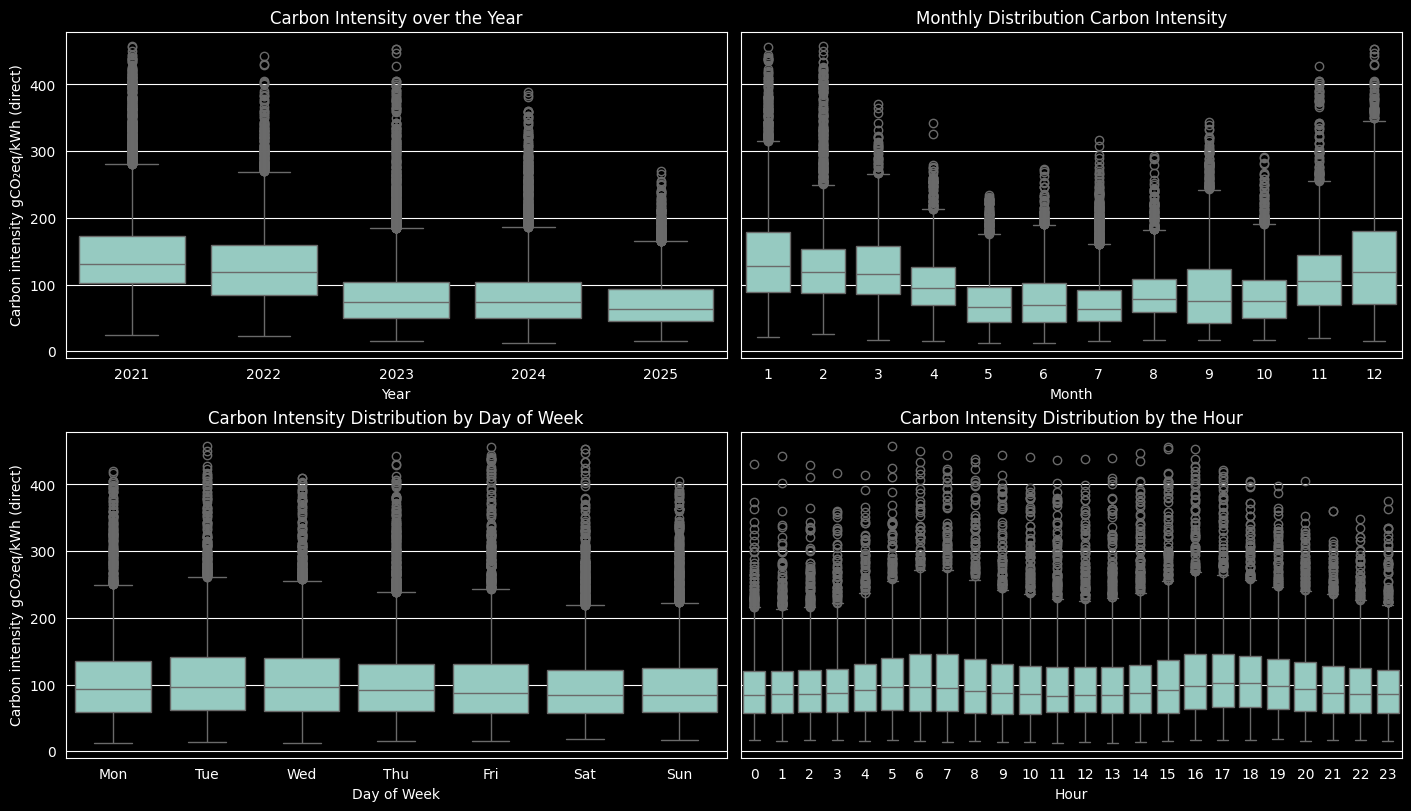

In [52]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df = emissions.copy()
df["Datetime (UTC)"] = pd.to_datetime(df["Datetime (UTC)"])
df = df.sort_values("Datetime (UTC)").reset_index(drop=True)


df["hour"] = df["Datetime (UTC)"].dt.hour
df["dayofweek"] = df["Datetime (UTC)"].dt.dayofweek
df["month"] = df["Datetime (UTC)"].dt.month
df["year"] = df["Datetime (UTC)"].dt.year

df = df.set_index('Datetime (UTC)')

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True, constrained_layout=True)

sns.boxplot(
    data=df,
    x="year",
    y="Carbon intensity gCO₂eq/kWh (direct)",
    ax=axes[0][0]
)
axes[0][0].set_xlabel("Year")
axes[0][0].set_title("Carbon Intensity over the Year")

sns.boxplot(
    data=df,
    x="month",
    y="Carbon intensity gCO₂eq/kWh (direct)",
    ax=axes[0][1]
)
axes[0][1].set_xlabel("Month")
axes[0][1].set_title("Monthly Distribution Carbon Intensity")

sns.boxplot(
    data=df,
    x="dayofweek",
    y="Carbon intensity gCO₂eq/kWh (direct)",
    ax=axes[1][0]
)
axes[1][0].set_xticks(range(7))
axes[1][0].set_xticklabels(days)
axes[1][0].set_xlabel("Day of Week")
axes[1][0].set_title("Carbon Intensity Distribution by Day of Week")

sns.boxplot(
    data=df,
    x="hour",
    y="Carbon intensity gCO₂eq/kWh (direct)",
    ax=axes[1][1]
)
axes[1][1].set_xlabel("Hour")
axes[1][1].set_title("Carbon Intensity Distribution by the Hour")

plt.show()

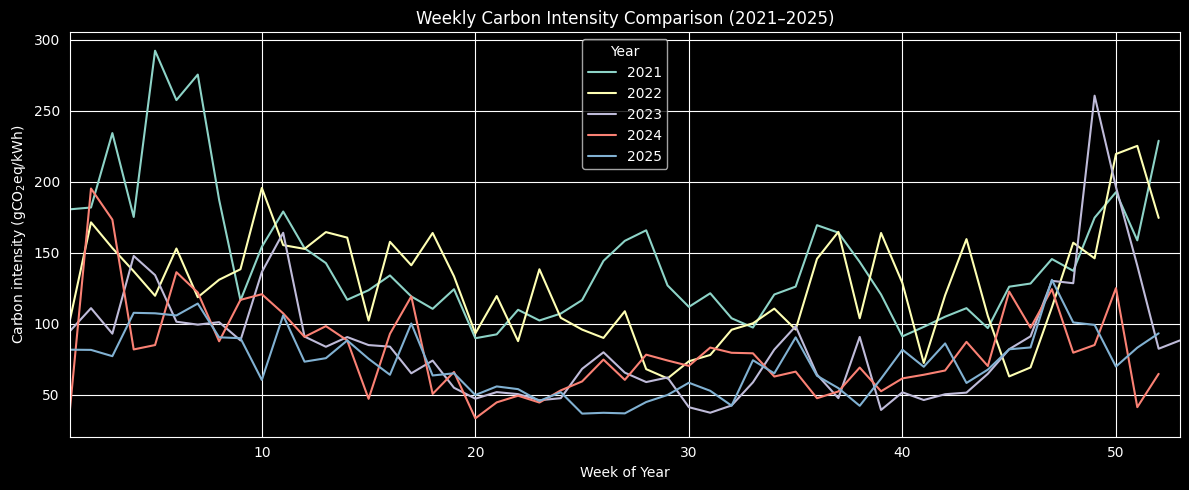

In [72]:
numeric_df = df.select_dtypes(include='number')

fig, ax = plt.subplots(figsize=(12, 5))

for year, data in numeric_df.groupby(numeric_df.index.year):
    weekly = data.resample('W').mean()

    # Convert to week-of-year based on day-of-year
    weekly['week'] = ((weekly.index.dayofyear - 1) // 7) + 1

    weekly = weekly.sort_values('week')

    ax.plot(
        weekly['week'],
        weekly['Carbon intensity gCO₂eq/kWh (direct)'],
        label=str(year)
    )

ax.set_xlim(1, 53)
ax.set_xlabel("Week of Year")
ax.set_ylabel("Carbon intensity (gCO$_2$eq/kWh)")
ax.set_title("Weekly Carbon Intensity Comparison (2021–2025)")
ax.legend(title="Year")

plt.tight_layout()
plt.show()